In [ ]:
import os

src="./archive/images"
width=150
height=150

data = dict()
data['description'] = 'resized ({0}x{1}) images in rgb'.format(int(width), int(height))
data['label'] = [] #Label of the classes
data['filename'] = []
data['data'] = [] 

for subdir in os.listdir(src):
    #subdir will be the filenames
    print(subdir)
    #current_path=os.path.join(src, subdir)
    current_path=src+"/"+subdir
    #print("current_path : ", curryent_path)
    if(subdir[-3:] in ['png', 'jpg', 'jpeg']):
        im = imread(current_path);
        im = resize(im, (width, height))
        data['target']

In [ ]:
import numpy as np
import pandas as pd
import os

src="./archive/annotations"
width=150
height=150

data = dict()
data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
data['label'] = [] #Label of the classes
data['filename'] = []
data['data'] = [] 

for subdir in os.listdir(src):
    #subdir will be the filenames
    #print(subdir)
    current_path=src+"/"+subdir
    df = pd.read_xml(current_path)
    #num_without_mask = df[df['name'].notnull()]['name'].tolist().count("without_mask");
    series_mask = df[df['name'].notnull()]['name']
    series_mask = series_mask[series_mask!="without_mask"]
    num_mask = series_mask.shape[0]
    if( num_mask>1 ):
        num_mask=1
    data['label'].append(num_mask)
print(len(data['label']))

In [ ]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
import matplotlib.pyplot as plt
 
mask1 = imread('./archive/images/maksssksksss99.png', as_gray=True)
 
# scale down the image to one third
mask1 = rescale(mask1, 1/3, mode='reflect')
# calculate the hog and return a visual representation.
mask1_hog, mask1_hog_img = hog(
    mask1, pixels_per_cell=(14, 14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')
 
print(mask1_hog.shape)
    
plt.imshow(mask1_hog_img, cmap='gray')
plt.show()

In [ ]:
#pip install -U scikit-image

In [3]:
# MAIN FUNCTION

from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

width=150
height=150

data = dict()
data['description'] = 'resized ({0}x{1})masked and non masked faces images in rgb'.format(int(width), int(height))
data['label'] = [] #Label of the classes
#data['filename'] = []
data['data'] = [] 

In [5]:
# LOADING THE DATASET 'ARCHIVE' from KAGGLE

src="./archive/annotations"

for xmlFile in os.listdir(src):
    current_path=src+"/"+xmlFile
    df = pd.read_xml(current_path)
    #num_without_mask = df[df['name'].notnull()]['name'].tolist().count("without_mask");
    series_mask = df[df['name'].notnull()]['name']
    series_mask = series_mask[series_mask!="without_mask"]
    nb_mask = series_mask.shape[0]
    if( nb_mask>1 ):
        nb_mask=1
    data['label'].append(nb_mask)

src="./archive/images"

for picture in os.listdir(src):
    #xmlFile will be the filenames
    #print(picture)
    #current_path=os.path.join(src, picture)
    current_path=src+"/"+picture
    #print("current_path : ", current_path)
    if(picture[-3:] in ['png', 'jpg']):
        img = imread(current_path, as_gray=True);
        # scale down the image to one third
        #img = rescale(img, 1/3, mode='reflect')
        img = resize(img, (width, height)) #[:,:,::-1]
        data['data'].append(img)
        
        # calculate the hog and its visual representation.
        #img_hog, img_hog_image = hog(
        #    img, pixels_per_cell=(14, 14), 
        #    cells_per_block=(2, 2), 
        #    orientations=9, 
        #    visualize=True, 
        #    block_norm='L2-Hys')
        #data['data'].append(img_hog)
        
# END LOADING THE DATASET 'ARCHIVE' from KAGGLE

print(len(data['label']))

853


In [ ]:
# LOADING THE DATASET 'RMFD'

src="./RMFD/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset"
#We are in the masked-faces subdirectory
for subdir in os.listdir(src):
    if(os.path.isdir(src+"/"+subdir)):
        # print("LA")
        for picture in os.listdir(src+"/"+subdir):
            #picture will be the pitcturename
            #print(subdir)
            #current_path=os.path.join(src, subdir)
            current_path=src+"/"+subdir+"/"+picture;
            #print("current_path : ", current_path)
            if(picture[-3:] in ['png', 'jpg']):
                img = imread(current_path, as_gray=True);
                # scale down the image to one third
                #img = rescale(img, 1/3, mode='reflect')
                img = resize(img, (width, height)) #[:,:,::-1]
                data['data'].append(img)
                data['label'].append(1)

src="./RMFD/self-built-masked-face-recognition-dataset/AFDB_face_dataset"
#We are in the non-masked-faces subdirectory
for subdir in os.listdir(src):
    if(os.path.isdir(src+"/"+subdir)):
        # print("LO")
        for picture in os.listdir(src+"/"+subdir):
            #picture will be the pitcturename
            #print(subdir)
            #current_path=os.path.join(src, subdir)
            current_path=src+"/"+subdir+"/"+picture
            #print("current_path : ", current_path)
            if(picture[-3:] in ['png', 'jpg']):
                img = imread(current_path, as_gray=True);
                # scale down the image to one third
                #img = rescale(img, 1/3, mode='reflect')
                img = resize(img, (width, height)) #[:,:,::-1]
                data['data'].append(img)
                data['label'].append(0)
            
# END LOADING THE DATASET 'RMFD'

print(len(data['label']))

In [6]:

# LOADING THE DATASET 'lfw'

cpt=0;

src="./lfw/lfw"
#We are in the non-masked-faces subdirectory
for subdir in os.listdir(src):
    if(cpt>=2000):
        break;
    if(os.path.isdir(src+"/"+subdir)):
        # print("LA")
        for picture in os.listdir(src+"/"+subdir):
            #picture will be the pitcturename
            #print(subdir)
            #current_path=os.path.join(src, subdir)
            current_path=src+"/"+subdir+"/"+picture;
            #print("current_path : ", current_path)
            if(picture[-3:] in ['png', 'jpg']):
                img = imread(current_path, as_gray=True);
                # scale down the image to one third
                #img = rescale(img, 1/3, mode='reflect')
                img = resize(img, (width, height)) #[:,:,::-1]
                data['data'].append(img)
                data['label'].append(0)
                cpt = cpt+1;

            
# END LOADING THE DATASET 'lfw'

print(len(data['label']))

2854


In [ ]:
# LOADING THE DATASET 'in the wild' only non masked faces
cpt=0

src="./in_the_wild/06000-20211215T092319Z-003/06000"
for picture in os.listdir(src):
    if(cpt==40):
        break
    if(os.path.isfile(src+"/"+picture)):
        # print("LA")
        current_path=src+"/"+picture
        #print("current_path : ", current_path)
        if(picture[-3:] in ['png', 'jpg']):
            img = imread(current_path, as_gray=True)
            # scale down the image to one third
            #img = rescale(img, 1/3, mode='reflect')
            img = resize(img, (width, height)) #[:,:,::-1]
            data['data'].append(img)
            data['label'].append(0)
            cpt=cpt+1
            
# END LOADING THE DATASET 'in the wild'

print(len(data['label']))

In [ ]:
print(data["data"][0])

In [7]:
from sklearn.model_selection import train_test_split

X = np.array(data['data'])
print("X shape :",X.shape)
print("X[0] shape :", X[0].shape)
y = np.array(data['label'])
print("Y shape :",y.shape)
print("Y[0] shape :", y[0].shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

print(X_train.shape)
print(X_test.shape)

X shape : (2854, 150, 150)
X[0] shape : (150, 150)
Y shape : (2854,)
Y[0] shape : ()
(2283, 150, 150)
(571, 150, 150)


In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
#X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(2283, 2916)


In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [11]:
#TESTS

#X_test_gray = grayify.transform(X_test) Pictures in X_test already gray
X_test_hog = hogify.transform(X_test)
X_test_prepared = scalify.transform(X_test_hog)

(150, 150)
(array([  5,  15,  23,  49,  63,  69,  70,  76, 114, 129, 147, 170, 182,
       191, 197, 218, 227, 252, 329, 335, 360, 370, 409, 449, 454, 456,
       500, 519, 549, 567], dtype=int64),)
type :  <class 'list'>
index : 5
index : 15
index : 23
index : 49
index : 63
index : 69
index : 70
index : 76
index : 114
index : 129
index : 147
index : 170
index : 182
index : 191
index : 197
index : 218
index : 227
index : 252
index : 329
index : 335
index : 360
index : 370
index : 409
index : 449
index : 454
index : 456
index : 500


C:\Users\nan0l\AppData\Local\Temp/ipykernel_5064/2109959606.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


index : 519
index : 549
index : 567

Percentage correct:  94.7460595446585


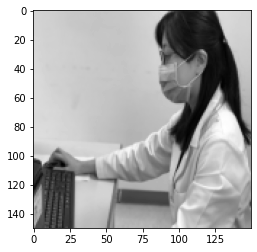

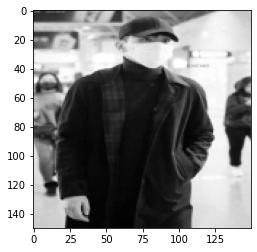

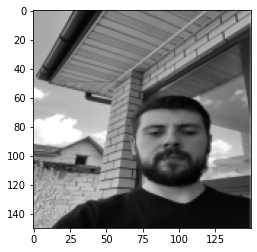

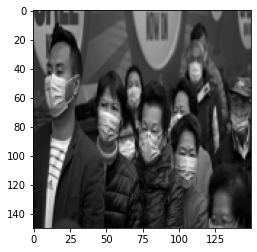

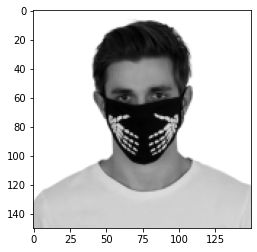

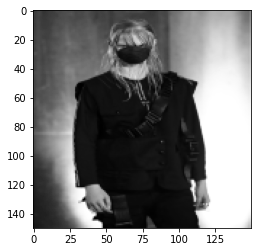

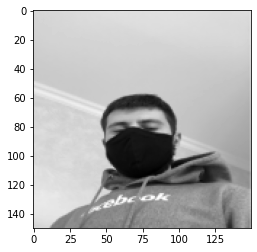

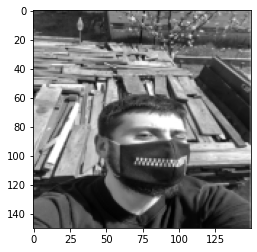

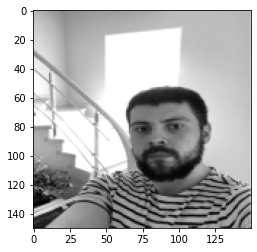

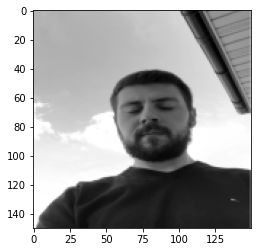

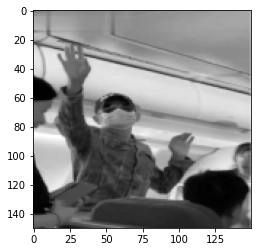

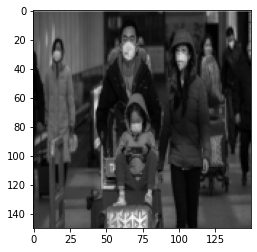

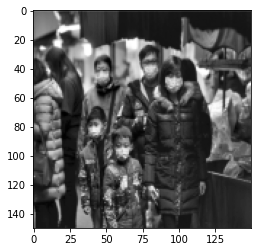

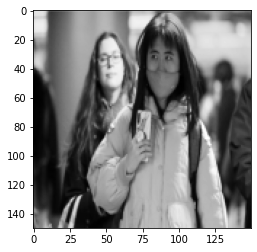

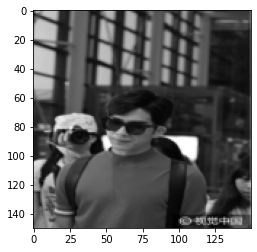

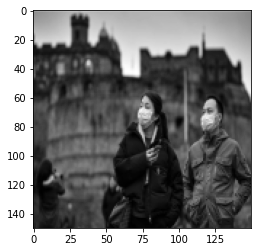

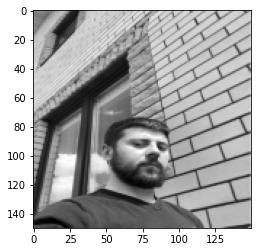

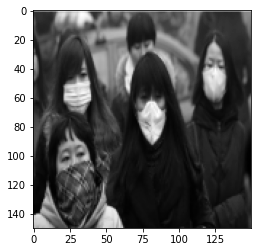

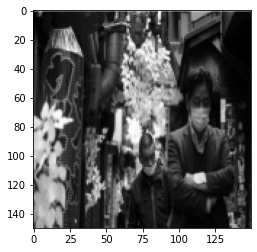

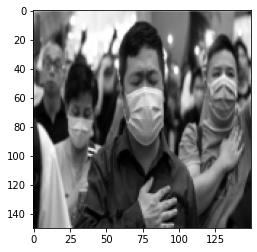

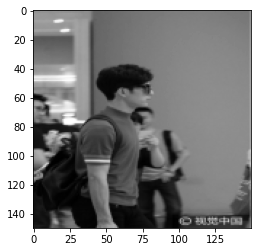

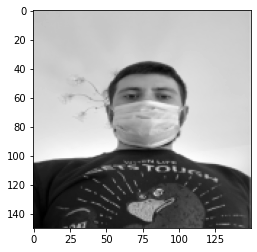

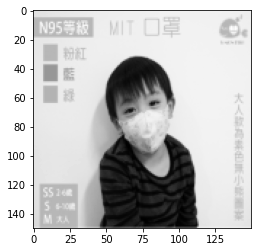

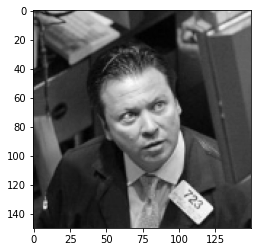

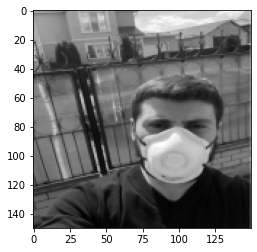

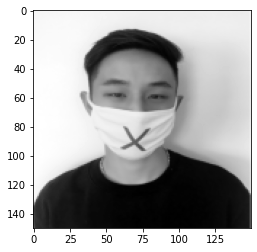

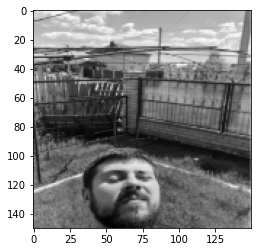

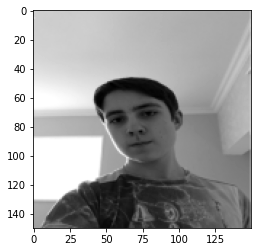

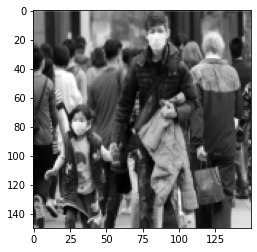

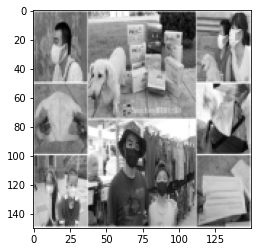

In [12]:
print(X_test[0].shape)
y_pred = sgd_clf.predict(X_test_prepared)
print(np.where(np.array(y_pred == y_test)==False))
errors_indexes = list(np.where(np.array(y_pred == y_test)==False)[0])
print("type : ", type(errors_indexes))
for index in errors_indexes :
    print("index :", index)
    plt.figure()
    plt.imshow(X_test[index], cmap="gray")
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

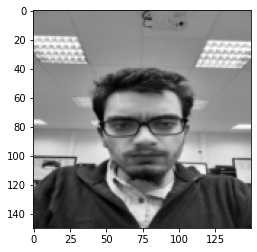

In [16]:
arnaud_img = imread("./testing_pictures/testing_picture (3).jpg", as_gray=True);
arnaud_img = resize(arnaud_img, (width, height)) #[:,:,::-1]
plt.imshow(arnaud_img, cmap="gray")

liste=[]
liste.append(arnaud_img)
X_Ara = np.array(liste);

X_Ara_hog = hogify.transform(X_Ara)
X_Ara_prepared = scalify.transform(X_Ara_hog)

In [17]:
y_pred = sgd_clf.predict(X_Ara_prepared)

In [18]:
print(y_pred)

[0]


In [46]:
print("pouet")

pouet


In [61]:
print(42*"18 ")

18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 
